In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.54 s (started: 2021-03-30 20:13:45 +00:00)


In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
time: 2.04 s (started: 2021-03-30 20:13:48 +00:00)


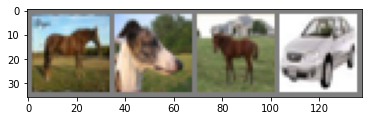

horse   dog horse   car
time: 256 ms (started: 2021-03-30 20:13:50 +00:00)


In [23]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.fc1 = nn.Linear(64 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 35)
        self.fc4 = nn.Linear(35, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()

time: 25.4 ms (started: 2021-03-30 20:15:15 +00:00)


In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

time: 1.47 ms (started: 2021-03-30 20:15:16 +00:00)


In [33]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.252
[1,  6000] loss: 1.976
[1,  8000] loss: 1.819
[1, 10000] loss: 1.672
[1, 12000] loss: 1.554
[2,  2000] loss: 1.445
[2,  4000] loss: 1.361
[2,  6000] loss: 1.303
[2,  8000] loss: 1.236
[2, 10000] loss: 1.214
[2, 12000] loss: 1.161
[3,  2000] loss: 1.045
[3,  4000] loss: 1.014
[3,  6000] loss: 0.996
[3,  8000] loss: 1.006
[3, 10000] loss: 0.933
[3, 12000] loss: 0.922
[4,  2000] loss: 0.818
[4,  4000] loss: 0.820
[4,  6000] loss: 0.822
[4,  8000] loss: 0.813
[4, 10000] loss: 0.781
[4, 12000] loss: 0.773
[5,  2000] loss: 0.644
[5,  4000] loss: 0.659
[5,  6000] loss: 0.677
[5,  8000] loss: 0.675
[5, 10000] loss: 0.672
[5, 12000] loss: 0.680
Finished Training
time: 19min 19s (started: 2021-03-30 20:15:16 +00:00)


In [34]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

time: 10.6 ms (started: 2021-03-30 20:34:36 +00:00)


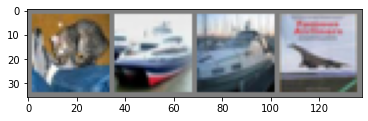

GroundTruth:    cat  ship  ship plane
time: 241 ms (started: 2021-03-30 20:34:36 +00:00)


In [35]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [36]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

time: 20.5 ms (started: 2021-03-30 20:34:36 +00:00)


In [37]:
outputs = net(images)

time: 14 ms (started: 2021-03-30 20:34:36 +00:00)


In [38]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane
time: 3.58 ms (started: 2021-03-30 20:34:36 +00:00)


In [39]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 73 %
time: 20.1 s (started: 2021-03-30 20:34:36 +00:00)


In [40]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 79 %
Accuracy of   car : 92 %
Accuracy of  bird : 59 %
Accuracy of   cat : 52 %
Accuracy of  deer : 79 %
Accuracy of   dog : 51 %
Accuracy of  frog : 81 %
Accuracy of horse : 83 %
Accuracy of  ship : 75 %
Accuracy of truck : 80 %
time: 20 s (started: 2021-03-30 20:34:57 +00:00)
